## 1 - Import necessary libraries for EDA of Challenge1

In [1]:
#import useful libraries for your EDA process
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model
import datetime as datetime
import seaborn as sns

# Data collection and import

## Load and save data

In [2]:
#Uploading Toggle data from system into python
file_path = r"C:\Users\31616\Desktop\Octahedral Dataset\Toggl Dataset.csv"  #insert your path
df_Toggle = pd.read_csv(file_path)

In [3]:
#Uploading Octahedral data from system into python
file_path = r"C:\Users\31616\Desktop\Octahedral Dataset\study_sessions.csv"  #insert your path
df_Octahedral = pd.read_csv(file_path)

# Data preparation

## Data exploration through general information

In [5]:
# Split the 'Description' column by comma into two new columns: 'Mood Level' and 'Task Completion'
# This handles None values as well
df_Toggle[['Mood Level', 'Task Completion']] = df_Toggle['Description'].str.split(',', expand=True)

# Clean up any leading or trailing whitespace
df_Toggle['Mood Level'] = df_Toggle['Mood Level'].str.strip()
df_Toggle['Task Completion'] = df_Toggle['Task Completion'].str.strip()

In [6]:
# Drop the specified columns
df_Toggle = df_Toggle.drop(columns=["User", "Email", "Client", "Task", "Billable", "Tags", "Amount (USD)","Duration", "Description"])


In [7]:
# Transform 'Task Completion' from 'no' to 0 and 'yes' to 1
df_Toggle['Task Completion'] = df_Toggle['Task Completion'].where(df_Toggle['Task Completion'] != 'no', 0)
df_Toggle['Task Completion'] = df_Toggle['Task Completion'].where(df_Toggle['Task Completion'] != 'yes', 1)


In [8]:
# Extract all data from df_Octahedral, including the first record
data = df_Octahedral.values.tolist()

# Define the column names for df_Octahedral
column_names = ['Project', 'Task Completion', 'Mood Level', 'Start date', 'Start time', 'End date', 'End time', 'Duration']

# Create the DataFrame and assign column names while keeping all rows
df_Octahedral = pd.DataFrame(data, columns=column_names)

In [9]:
# Drop the specified columns
df_Octahedral = df_Octahedral.drop(columns=["Duration"])

In [10]:
df_Toggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Project          23 non-null     object
 1   Start date       23 non-null     object
 2   Start time       23 non-null     object
 3   End date         23 non-null     object
 4   End time         23 non-null     object
 5   Mood Level       21 non-null     object
 6   Task Completion  21 non-null     object
dtypes: object(7)
memory usage: 1.4+ KB


In [11]:
df_Octahedral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Project          34 non-null     object
 1   Task Completion  34 non-null     int64 
 2   Mood Level       34 non-null     int64 
 3   Start date       34 non-null     object
 4   Start time       34 non-null     object
 5   End date         34 non-null     object
 6   End time         34 non-null     object
dtypes: int64(2), object(5)
memory usage: 2.0+ KB


In [12]:
# Convert 'Start time' and 'End time' to proper time format
df_Toggle['Start time'] = pd.to_datetime(df_Toggle['Start time'], format='%H:%M:%S').dt.time
df_Octahedral['Start time'] = pd.to_datetime(df_Octahedral['Start time'], format='%H:%M:%S').dt.time
df_Toggle['End time'] = pd.to_datetime(df_Toggle['End time'], format='%H:%M:%S').dt.time
df_Octahedral['End time'] = pd.to_datetime(df_Octahedral['End time'], format='%H:%M:%S').dt.time

# Convert 'Mood Level' to integer
df_Toggle['Mood Level'] = pd.to_numeric(df_Toggle['Mood Level'], errors='coerce').astype('Int64')
df_Octahedral['Mood Level'] = pd.to_numeric(df_Octahedral['Mood Level'], errors='coerce').astype('Int64')

# Convert 'Task Completion' to integer
df_Toggle['Task Completion'] = pd.to_numeric(df_Toggle['Task Completion'], errors='coerce').astype('Int64')
df_Octahedral['Task Completion'] = pd.to_numeric(df_Octahedral['Task Completion'], errors='coerce').astype('Int64')

# Display column types to confirm changes
print(df_Toggle.dtypes)
print(df_Octahedral.dtypes)



Project            object
Start date         object
Start time         object
End date           object
End time           object
Mood Level          Int64
Task Completion     Int64
dtype: object
Project            object
Task Completion     Int64
Mood Level          Int64
Start date         object
Start time         object
End date           object
End time           object
dtype: object


In [13]:
# Define the desired column order
desired_order = ['Project', 'Start date', 'Start time', 'End date', 'End time', 'Mood Level', 'Task Completion']

# Reorder the columns in df_Octahedral and df_Toggle based on the desired order
df_Octahedral = df_Octahedral[desired_order]
df_Toggle = df_Toggle[desired_order]

# Display the updated DataFrames to confirm the change
print("Updated df_Octahedral:")
print(df_Octahedral.head())

print("\nUpdated df_Toggle:")
print(df_Toggle.head())

Updated df_Octahedral:
  Project  Start date Start time    End date  End time  Mood Level  \
0      DT  2024-11-12   16:13:36  2024-11-12  16:13:25           7   
1      DT  2024-11-12   16:13:36  2024-11-12  16:12:29           7   
2      DT  2024-11-12   16:13:36  2024-11-12  16:09:08           7   
3      DT  2024-11-12   16:13:36  2024-11-12  16:08:12           7   
4      DT  2024-11-12   16:13:36  2024-11-12  16:07:53           7   

   Task Completion  
0                1  
1                1  
2                1  
3                1  
4                1  

Updated df_Toggle:
  Project  Start date Start time    End date  End time  Mood Level  \
0      SE  2024-10-21   14:00:00  2024-10-21  14:30:00           1   
1      SE  2024-10-21   15:30:00  2024-10-21  17:22:00           3   
2     PBR  2024-10-22   09:24:00  2024-10-22  13:51:12           6   
3   break  2024-10-22   13:51:00  2024-10-22  14:25:00        <NA>   
4     PBR  2024-10-22   14:17:45  2024-10-22  15:23:22      

In [14]:
# Check if column names are the same
if list(df_Octahedral.columns) != list(df_Toggle.columns):
    print("Column name mismatch!")
    mismatched_columns = [
        (col1, col2) for col1, col2 in zip(df_Octahedral.columns, df_Toggle.columns) if col1 != col2
    ]
    print(f"Mismatched column names: {mismatched_columns}")
else:
    print("Column names match!")

# Check if column data types are the same
mismatched_data_types = [
    (col, df_Octahedral[col].dtype, df_Toggle[col].dtype)
    for col in df_Octahedral.columns
    if df_Octahedral[col].dtype != df_Toggle[col].dtype
]

if mismatched_data_types:
    print("Column data type mismatch!")
    for col, dtype1, dtype2 in mismatched_data_types:
        print(f"Column '{col}': df_Octahedral has dtype {dtype1}, df_Toggle has dtype {dtype2}")
else:
    print("Column data types match!")

Column names match!
Column data types match!


In [15]:
import pandas as pd

# Reorder columns in both DataFrames to ensure consistency
desired_order = ['Project', 'Start date', 'Start time', 'End date', 'End time', 'Mood Level', 'Task Completion']
df_Octahedral = df_Octahedral[desired_order]
df_Toggle = df_Toggle[desired_order]

# Merge the DataFrames with df_Octahedral appended after df_Toggle
df = pd.concat([df_Toggle, df_Octahedral], ignore_index=True)

In [16]:
# Check if all values in 'Start date' are equal to the corresponding values in 'End date'
all_dates_equal = (df['Start date'] == df['End date']).all()

# Print the result
if all_dates_equal:
    print("All start dates are equal to end dates.")
else:
    print("Not all start dates are equal to end dates.")

All start dates are equal to end dates.


In [17]:
# Drop the specified columns
df = df.drop(columns=["End date"])


In [18]:
# Find and delete records where 'Project' is 'break'
df = df[df['Project'] != 'break']


In [19]:
# Drop rows where 'Task Completion' or 'Mood Level' has NaN values
df = df.dropna(subset=['Project','Start date','Start time', 'End time', 'Task Completion', 'Mood Level'])


In [20]:
# Convert 'Start time' and 'End time' columns to datetime for comparison
df['Start time'] = pd.to_datetime(df['Start time'], format='%H:%M:%S', errors='coerce')
df['End time'] = pd.to_datetime(df['End time'], format='%H:%M:%S', errors='coerce')

# Filter out records where 'End time' is less than 'Start time'
df = df[df['End time'] >= df['Start time']]



In [21]:
# Convert 'Start time' and 'End time' to datetime.time format for comparison
df['Start time'] = pd.to_datetime(df['Start time'], format='%H:%M:%S', errors='coerce').dt.time
df['End time'] = pd.to_datetime(df['End time'], format='%H:%M:%S', errors='coerce').dt.time

# Filter out records where 'End time' is less than 'Start time'
df = df[df['End time'] >= df['Start time']]


In [22]:
# Convert 'Start time' and 'End time' to timedelta for calculation while preserving original hh:mm:ss format
df['Start time (timedelta)'] = pd.to_datetime(df['Start time'], format='%H:%M:%S', errors='coerce')
df['End time (timedelta)'] = pd.to_datetime(df['End time'], format='%H:%M:%S', errors='coerce')

# Calculate duration in minutes, rounding to 2 decimal places
df['Duration'] = ((df['End time (timedelta)'] - df['Start time (timedelta)']).dt.total_seconds() / 60).round(2)

# Drop helper columns
df = df.drop(columns=['Start time (timedelta)', 'End time (timedelta)'])



In [ ]:
# Filter out records where 'Duration' is less than 1 or greater than 240
df = df[(df['Duration'] >= 1) & (df['Duration'] <= 300)]



In [24]:
# change column name
df.rename(columns={'Project': 'Course'}, inplace=True)
df.rename(columns={'Start date': 'Date'}, inplace=True)
df.rename(columns={'Date': 'Study Date'}, inplace=True)



In [27]:
# Round the specified columns to 2 decimal places
df['Duration'] = df['Duration'].round(2)

In [29]:
print(df.columns)

Index(['Course', 'Study Date', 'Start time', 'End time', 'Mood Level',
       'Task Completion', 'Duration'],
      dtype='object')


Available columns: Index(['Course', 'Study Date', 'Start time', 'End time', 'Mood Level',
       'Task Completion', 'Duration'],
      dtype='object')
Graph saved successfully at: C:\Users\31616\Desktop\Octahedral Dataset\updated_visualization_with_fixed_duration_labels.jpg


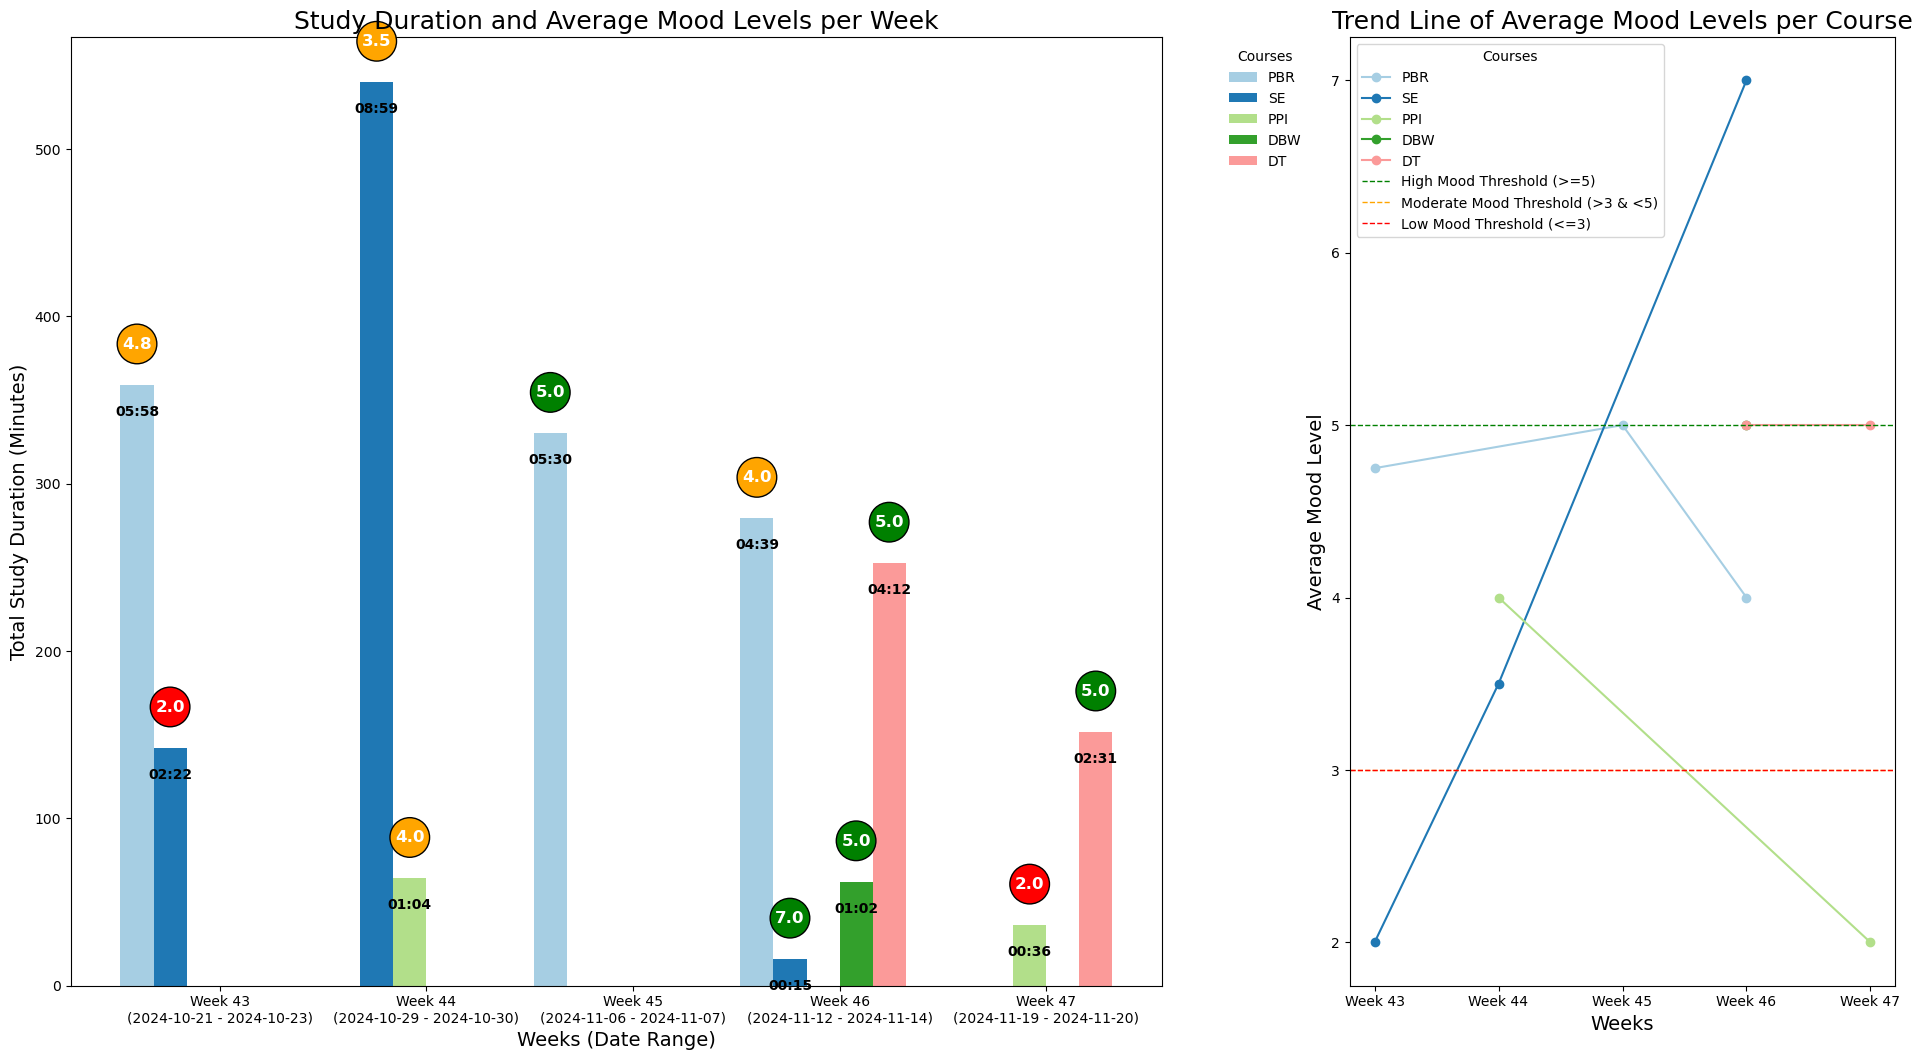

In [30]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

# Check column names
print("Available columns:", df.columns)

# Ensure the correct column name is used
if 'Study date' in df.columns:
    date_column = 'Study date'
elif 'Study Date' in df.columns:
    date_column = 'Study Date'
else:
    raise KeyError("The column for study date does not exist. Check your DataFrame's column names.")

# Define the function to convert minutes to HH:MM format
def minutes_to_hhmm(minutes):
    hours = int(minutes // 60)
    mins = int(minutes % 60)
    return f"{hours:02}:{mins:02}"

# Define a function to classify mood level colors
def classify_mood_color(mood):
    if mood <= 3:
        return 'red'
    elif 3 < mood < 5:
        return 'orange'
    else:
        return 'green'

# Group data for the bar chart
df['Week'] = pd.to_datetime(df[date_column]).dt.isocalendar().week
grouped_df = df.groupby(['Week', 'Course']).agg(
    Duration=('Duration', 'sum'), 
    Avg_Mood=('Mood Level', 'mean'),
    Start_Date=(date_column, 'min'),
    End_Date=(date_column, 'max')
).reset_index()

# Set up the figure with two subplots (bar chart and trend line for average mood levels)
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

# Bar chart subplot
ax1 = fig.add_subplot(gs[0])

# Get unique weeks and courses
weeks = sorted(grouped_df['Week'].unique())
courses = grouped_df['Course'].unique()

# Define distinct bar colors
bar_colors = plt.cm.Paired.colors

# Set bar width dynamically
bar_width = 0.8 / len(courses)

# Plot the bars for each course and annotate average mood
for i, course in enumerate(courses):
    course_data = grouped_df[grouped_df['Course'] == course]
    x_positions = [
        week + (i - len(courses) / 2) * bar_width for week in course_data['Week']
    ]
    bars = ax1.bar(
        x_positions, course_data['Duration'], width=bar_width, color=bar_colors[i], label=course
    )

    # Add average mood level annotation with classified colors
    for bar, avg_mood, duration in zip(bars, course_data['Avg_Mood'], course_data['Duration']):
        mood_color = classify_mood_color(avg_mood)
        avg_mood_label = f"{round(avg_mood, 1)}"
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 20,
            avg_mood_label,
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold',
            color='white',
            bbox=dict(facecolor=mood_color, edgecolor='black', boxstyle='circle,pad=0.3')
        )

        # Add total study duration in HH:MM format near the top of the bar
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() - 20,
            minutes_to_hhmm(duration),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold',
            color='black'
        )

# Set titles and labels for the bar chart
ax1.set_title('Study Duration and Average Mood Levels per Week', fontsize=18)
ax1.set_xlabel('Weeks (Date Range)', fontsize=14)
ax1.set_ylabel('Total Study Duration (Minutes)', fontsize=14)

# Format the x-axis with week numbers and date ranges
week_labels = [
    f"Week {week}\n({grouped_df[grouped_df['Week'] == week]['Start_Date'].min()} - {grouped_df[grouped_df['Week'] == week]['End_Date'].max()})"
    for week in weeks
]
ax1.set_xticks(weeks)
ax1.set_xticklabels(week_labels, fontsize=10)

# Add legend outside the chart
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title='Courses', loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)

# Trend line chart for average mood levels
ax2 = fig.add_subplot(gs[1])

# Plot trend lines for each course
for i, course in enumerate(courses):
    course_data = grouped_df[grouped_df['Course'] == course]
    ax2.plot(
        course_data['Week'], course_data['Avg_Mood'], marker='o', label=course, color=bar_colors[i]
    )

# Set titles and labels for the trend line chart
ax2.set_title('Trend Line of Average Mood Levels per Course', fontsize=18)
ax2.set_xlabel('Weeks', fontsize=14)
ax2.set_ylabel('Average Mood Level', fontsize=14)
ax2.set_xticks(weeks)
ax2.set_xticklabels([f"Week {week}" for week in weeks], fontsize=10)
ax2.axhline(y=5, color='green', linestyle='--', linewidth=1, label='High Mood Threshold (>=5)')
ax2.axhline(y=3, color='orange', linestyle='--', linewidth=1, label='Moderate Mood Threshold (>3 & <5)')
ax2.axhline(y=3, color='red', linestyle='--', linewidth=1, label='Low Mood Threshold (<=3)')
ax2.legend(title='Courses', fontsize=10)

# Adjust layout
plt.tight_layout()

# Save the figure to a file in JPG format with the size of a desktop
output_path = r'C:\Users\31616\Desktop\Octahedral Dataset\updated_visualization_with_fixed_duration_labels.jpg'
fig.set_size_inches(19.2, 10.8)  # Adjust figure size for desktop resolution
plt.savefig(output_path, format='jpg', dpi=100)

print(f"Graph saved successfully at: {output_path}")
plt.show()